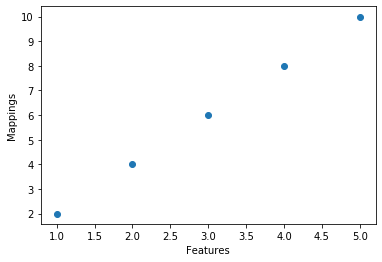

In [13]:
import numpy as np
from matplotlib import pyplot as plt

FRAME_LENGTH = 10

def prepareData(frames):
    return np.random.randint(20, size=frames)

def scatter(X, y):
    plt.scatter(X, y)
    plt.xlabel("Features")
    plt.ylabel("Mappings")
    plt.show()

def plot_fit_line(X, y, y_pred):
    plt.plot(X, y_pred, c="r")
    plt.scatter(X, y, c="b")
    plt.xlabel("Features")
    plt.ylabel("Mapping")
    plt.show()

# X = prepareData(FRAME_LENGTH)
# y = prepareData(FRAME_LENGTH)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

scatter(X, y)



    r: 7.250000000000002
    R2: 1.0
    b0: 0.0
    b1: 2.0
    SS_res: 0.0
    SS_tot: 155.20000000000005


+---+----+--------+
| X | y  | y_pred |
+---+----+--------+
| 1 | 2  |  2.0   |
| 2 | 4  |  4.0   |
| 3 | 6  |  6.0   |
| 4 | 8  |  8.0   |
| 5 | 10 |  10.0  |
+---+----+--------+


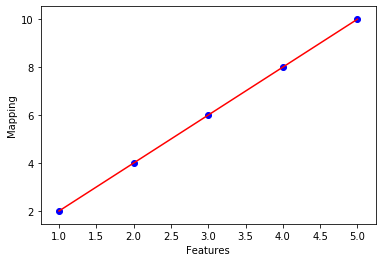

In [25]:
# from tabulate import tabulate
from prettytable import PrettyTable

def sumOfSquares(y1, y2):
    S = 0
    if type(y2) is float:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2) ** 2
            S += diff_square
        return S
    else:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2[i]) ** 2
            S += diff_square
        return S
            
def estimate_parameters(X, y):
    
    X_mean, y_mean = float(np.mean(X)), float(np.mean(y))
    
    n = np.size(X)
    S1 = 0
    S2 = 0
    
    _X, _y = (X - X_mean), (y - y_mean)
    S1 = np.sum(_X * _y)
    S2 = np.sum(_X * _X)

    b1 = S1 / S2
    b0 = y_mean - (b1 * X_mean)
    return (b0, b1)

b0, b1 = estimate_parameters(X, y)

y_pred = b0 + X * b1

SS_res = sumOfSquares(y, y_pred)
SS_tot = sumOfSquares(y, y_mean)

R2 = 1.0 - (SS_res / SS_tot) # R2 (Coefficient of Determination) determined by 1 - (SS_res / SS_tot)

var_X = np.var(X)
var_y = np.var(y)

SS_xy = np.sum((X - X_mean) * (y - y_mean))

r_deg_correlation = SS_xy / (var_X * var_y) # Degree of correlation defined as SS_xy / (var(X) * var(Y))

print('''

    r: {}
    R2: {}
    b0: {}
    b1: {}
    SS_res: {}
    SS_tot: {}

'''.format(r_deg_correlation, R2, b0, b1, SS_res, SS_tot))

table = PrettyTable(['X', 'y', 'y_pred'])
for i in range(len(X)):
    table.add_row([str(X[i]), str(y[i]), str(y_pred[i])])

print(table)

plot_fit_line(X, y, y_pred)
